# Análise exploratória de Dados com Python - dataset Churn

Objetivo: tratamento e limpeza dos dados

In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importando dados
df = pd.read_csv('../datasets/Churn.csv', sep=';', encoding='iso-8859-1')

## exploração

In [3]:
# conhecendo os dados
df

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [4]:
# renomando as colunas
df.columns = ['id', 'score', 'estado', 'genero', 'idade', 'patrimonio', 'saldo', 'produtos', 'tem_cartao_credito', 'ativo', 'salario', 'saiu']

In [5]:
# informações sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  999 non-null    int64  
 1   score               999 non-null    int64  
 2   estado              999 non-null    object 
 3   genero              991 non-null    object 
 4   idade               999 non-null    int64  
 5   patrimonio          999 non-null    int64  
 6   saldo               999 non-null    int64  
 7   produtos            999 non-null    int64  
 8   tem_cartao_credito  999 non-null    int64  
 9   ativo               999 non-null    int64  
 10  salario             992 non-null    float64
 11  saiu                999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [6]:
# buscando dados nulos
df.isnull().sum()

id                    0
score                 0
estado                0
genero                8
idade                 0
patrimonio            0
saldo                 0
produtos              0
tem_cartao_credito    0
ativo                 0
salario               7
saiu                  0
dtype: int64

In [7]:
# describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,999.0,5.009169e+02,2.886629e+02,1.0,251.50,501.0,750.5,1.000000e+03
score,999.0,6.486216e+02,9.826422e+01,376.0,580.00,653.0,721.0,8.500000e+02
idade,999.0,3.890290e+01,1.140191e+01,-20.0,32.00,37.0,44.0,1.400000e+02
patrimonio,999.0,5.069069e+00,2.927691e+00,0.0,2.00,5.0,8.0,1.000000e+01
saldo,999.0,7.164928e+06,6.311840e+06,0.0,0.00,8958835.0,12586844.0,2.117743e+07
produtos,999.0,1.526527e+00,5.742007e-01,1.0,1.00,1.0,2.0,4.000000e+00
tem_cartao_credito,999.0,7.027027e-01,4.572974e-01,0.0,0.00,1.0,1.0,1.000000e+00
ativo,999.0,5.095095e-01,5.001600e-01,0.0,0.00,1.0,1.0,1.000000e+00
salario,992.0,3.528762e+07,5.305800e+08,9677.0,3029011.25,8703249.5,14052128.0,1.193469e+10
saiu,999.0,2.032032e-01,4.025840e-01,0.0,0.00,0.0,0.0,1.000000e+00


In [8]:
# buscando dados duplicados por id
df[df.duplicated()]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


##  exploração atributos

### categoricos

estado
RS    478
SC    258
PR    257
SP      4
RP      1
TD      1
Name: count, dtype: int64

RS é o estado mais frequente

 Dados faltantes:        id  score estado     genero  idade  patrimonio     saldo  produtos  \
0       1    619     RS   Feminino     42           2         0         1   
1       2    608     SC   Feminino     41           1   8380786         1   
2       3    502     RS   Feminino     42           8   1596608         3   
3       4    699     RS   Feminino     39           1         0         2   
4       5    850     SC   Feminino     43           2  12551082         1   
..    ...    ...    ...        ...    ...         ...       ...       ...   
994   996    838     SC  Masculino     43           9  12310588         2   
995   997    610     SC  Masculino     29           9         0         3   
996   998    811     SC  Masculino     44           3         0         2   
997   999    587     SC  Masculino     62           7  12128627         1   
998  1000 

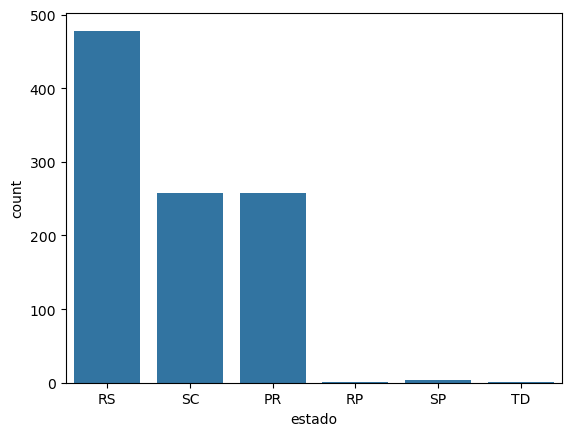

In [21]:
# estado
print(df['estado'].value_counts())
print(f'\n{df.estado.mode()[0]} é o estado mais frequente')
print(f'\n Dados faltantes: {df}')
sns.countplot(x='estado', data=df);

genero
Masculino    521
Feminino     461
M              6
F              2
Fem            1
Name: count, dtype: int64

Masculino é o genero mais frequente


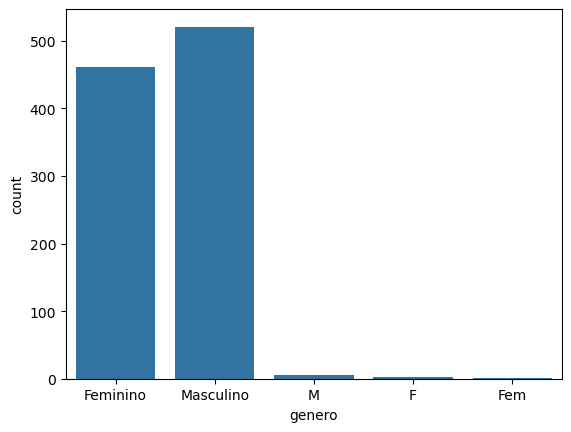

In [22]:
# genero
print(df['genero'].value_counts())
print(f'\n{df.genero.mode()[0]} é o genero mais frequente')
sns.countplot(x='genero', data=df);

### numericas

Resumo estatístico para score:
count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: score, dtype: float64



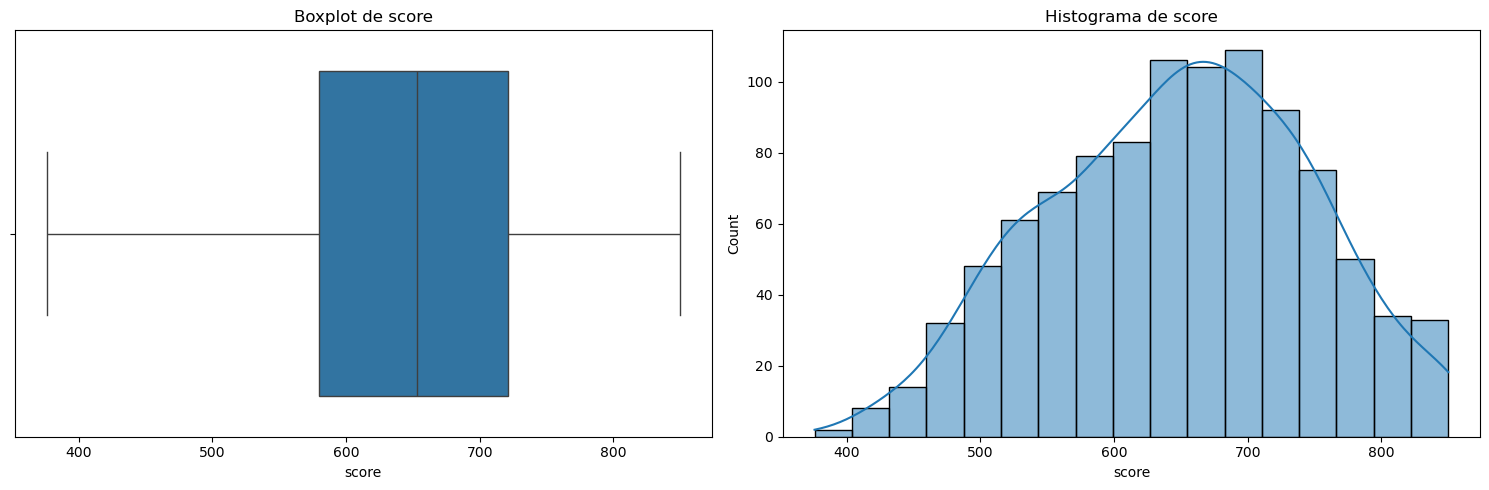

Resumo estatístico para idade:
count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: idade, dtype: float64



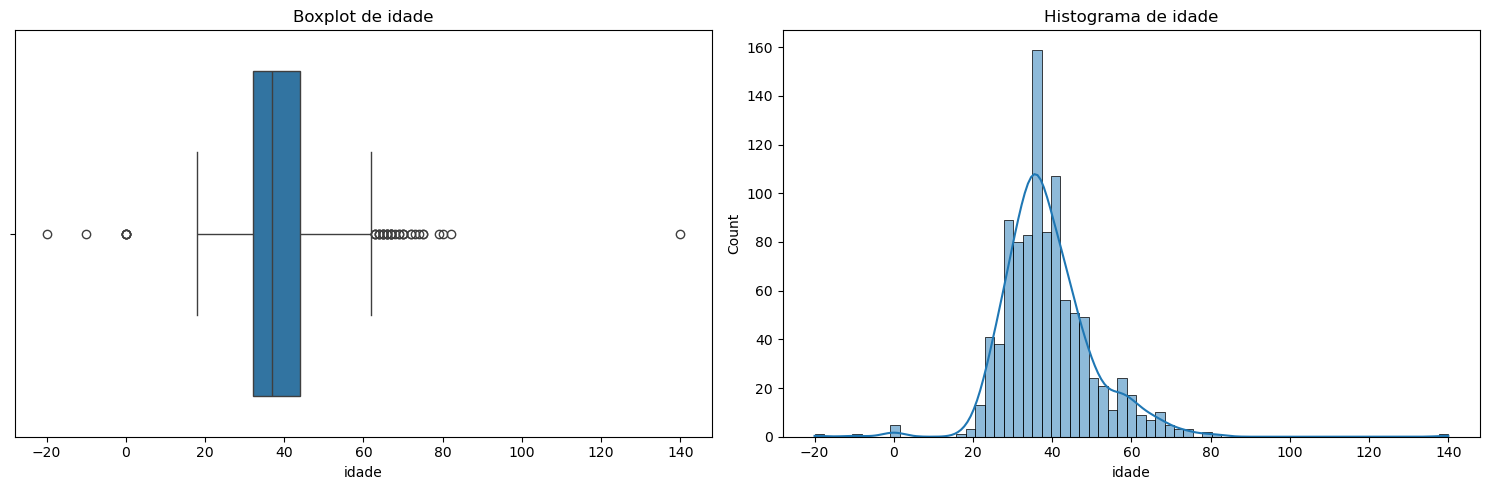

Resumo estatístico para saldo:
count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: saldo, dtype: float64



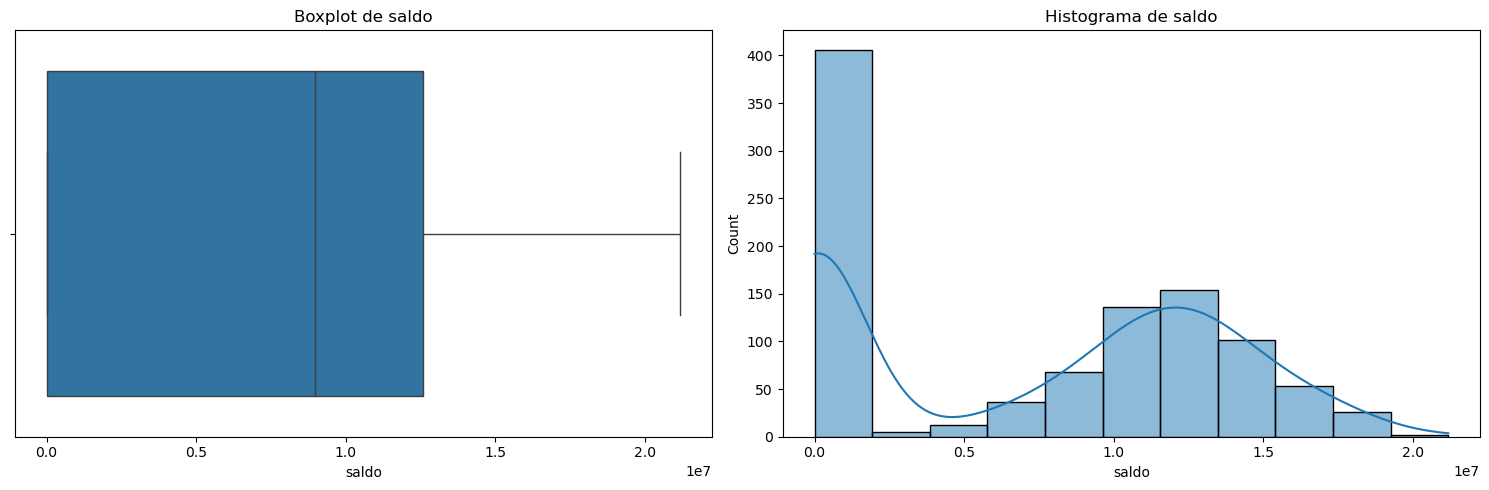

Resumo estatístico para salario:
count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salario, dtype: float64



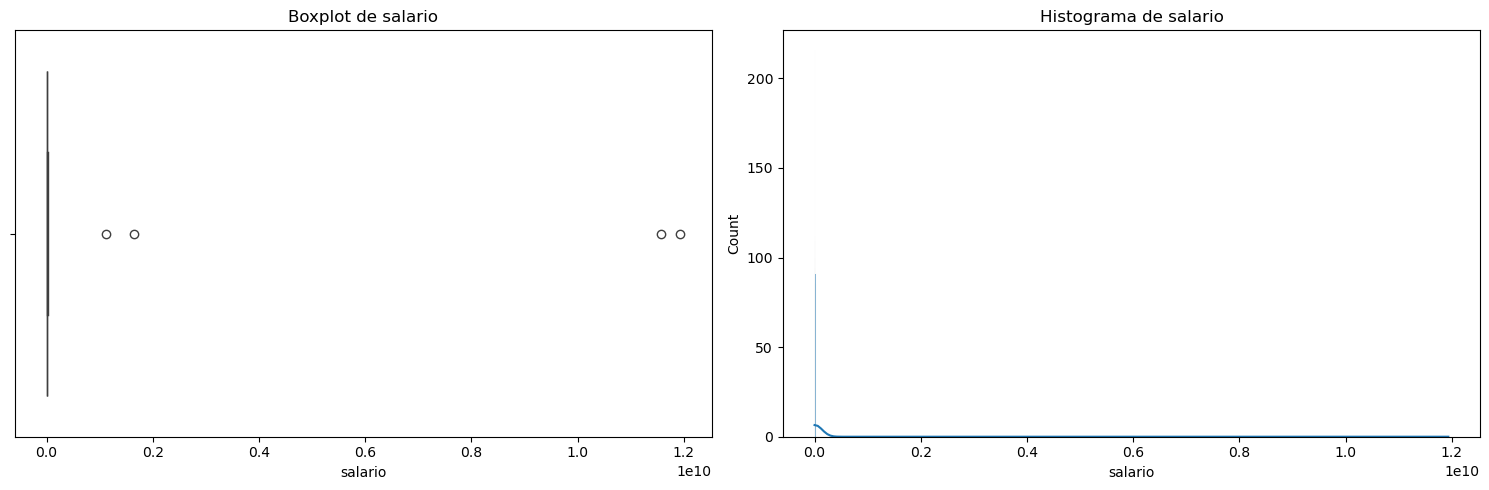

In [23]:
# visualizar sumario, boxplot e histograma
for col in df[['score', 'idade', 'saldo', 'salario']].columns:
    print(f"Resumo estatístico para {col}:\n{df[col].describe()}\n")
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    sns.boxplot(x=df[col], ax=ax[0]).set_title(f'Boxplot de {col}')
    sns.histplot(x=df[col],kde=True, ax=ax[1]).set_title(f'Histograma de {col}')

    plt.tight_layout()
    plt.show()

## tratamento de dados 

In [160]:
# dataframe cópia
df2 = df.copy()

In [161]:
# verficando id duplicado
df2[df2.id.duplicated()]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [162]:
# remoção de id duplicado
df2 = df2.drop_duplicates(subset='id', keep='first')

In [163]:
# verficando alterações
df2[df2.id.duplicated()]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu


### categoricos

Valores únicos antes do tratamento: ['Feminino' 'Masculino' 'M' nan 'F' 'Fem']
Dados nulos ou ausentes antes do tratamento: 8

Valores únicos após o tratamento: ['Feminino' 'Masculino']
Dados nulos ou ausentes após o tratamento: 0

Contagem de valores únicos: 
genero
Masculino    535
Feminino     463
Name: count, dtype: int64



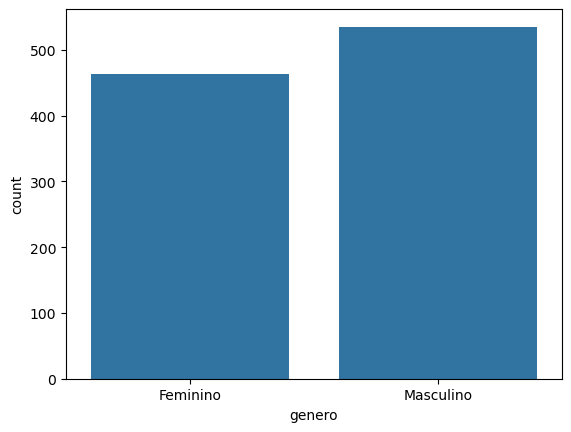

In [164]:
# atributo genero
# verificando dados fora de dominio
print(f'Valores únicos antes do tratamento: {df2['genero'].unique()}')

# verificando dados nulos
print(f'Dados nulos ou ausentes antes do tratamento: {df2['genero'].isna().sum()}')

# substituindo dados nulos com a moda
df2['genero'] = df2['genero'].fillna(df2['genero'].mode()[0])

# substituindo valores fora do dominio
df2['genero'] = df2['genero'].replace(['M', 'F'], ['Masculino', 'Feminino']).replace('Fem','Feminino')

# verificando alterações
print(f'\nValores únicos após o tratamento: {df2['genero'].unique()}')
print(f'Dados nulos ou ausentes após o tratamento: {df2['genero'].isna().sum()}')
print(f'\nContagem de valores únicos: \n{df2['genero'].value_counts()}\n')

# visualizando 
sns.countplot(x='genero', data=df2);

In [165]:
# atributo estado
# verificando dados fora de dominio
print(f'Valores únicos antes do tratamento: {df2['estado'].unique()}')

# verificando dados nulos
print(f'Dados nulos ou ausentes antes do tratamento: {df2['estado'].isna().sum()}')

Valores únicos antes do tratamento: ['RS' 'SC' 'PR' 'RP' 'SP' 'TD']
Dados nulos ou ausentes antes do tratamento: 0



Valores únicos depois do tratamento: ['RS' 'SC' 'PR']

Contagem de valores únicos: 
estado
RS    483
SC    258
PR    257
Name: count, dtype: int64



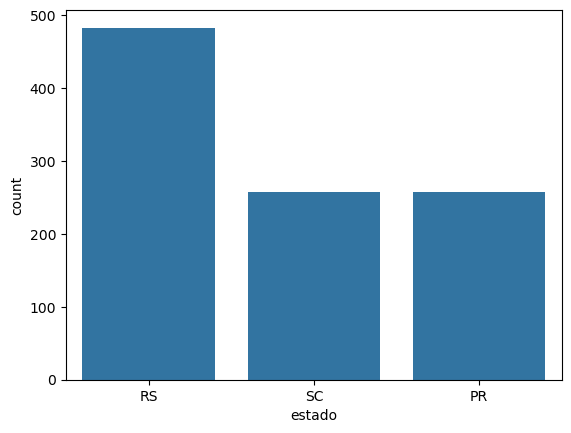

In [166]:
# substituindo valores fora do dominio pela moda
df2.loc[(df2['estado'] == 'SP') | (df2['estado'] == 'TD') | (df2.estado == 'RP'),'estado'] = df2['estado'].mode()[0]

# verificando alterações
print(f'\nValores únicos depois do tratamento: {df2['estado'].unique()}')
print(f'\nContagem de valores únicos: \n{df2['estado'].value_counts()}\n')

# visualizando
sns.countplot(x='estado', data=df2);

### numericos

#### idade

In [167]:
# verificando dados nulos ou ausentes
print(f'Dados nulos ou ausentes antes do tratamento: {df2.idade.isna().sum()}')

# verificando dados fora de dominio
print('\nRegistros fora do dominio:')
df2.loc[(df2['idade'] >= 110) | (df2['idade'] <= 0)]

Dados nulos ou ausentes antes do tratamento: 0

Registros fora do dominio:


,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
851,853,667,PR,Feminino,0,1,9713392,2,0,0,11331677.0,1
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
887,889,585,RS,Masculino,0,2,0,2,1,1,1865777.0,0
930,932,661,SC,Masculino,0,6,13262898,1,0,0,3881267.0,0
931,933,564,PR,Masculino,0,9,10352275,2,1,1,3433821.0,0
947,949,715,RS,Feminino,0,5,11859041,1,1,1,568417.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [168]:
# substituindo valores fora do dominio pela mediana
df2.loc[(df2['idade'] >= 110) | (df2['idade'] <= 0)] = df2['idade'].median()

# verificando alterações    
df2.loc[(df2['idade'] >= 110) | (df2['idade'] <= 0)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu


In [169]:
df2.idade.describe()

count    998.000000
mean      39.094188
std       10.314179
min       18.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: idade, dtype: float64

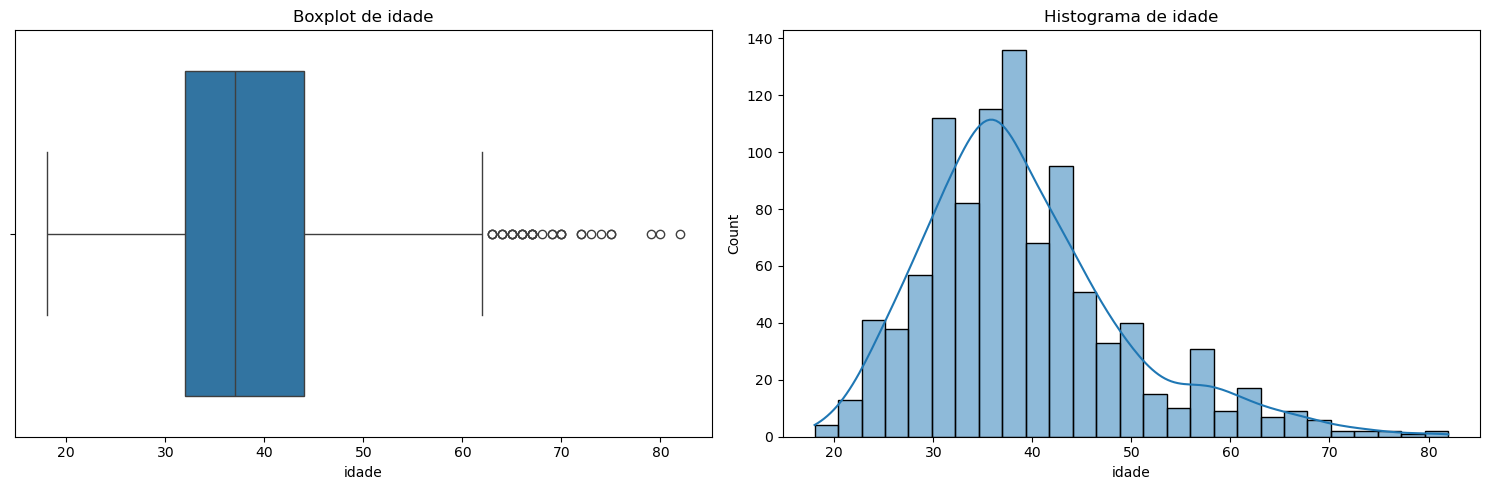

In [170]:
# visualizando
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=df2['idade'], ax=ax[0]).set_title('Boxplot de idade');
sns.histplot(x=df2['idade'], kde=True, ax=ax[1]).set_title('Histograma de idade');
plt.tight_layout()
plt.show()

#### salario

In [171]:
# verificando dados nulos ou ausentes
print(f'Dados nulos ou ausentes antes do tratamento: {df2.salario.isna().sum()}')

Dados nulos ou ausentes antes do tratamento: 7


In [172]:
# registros com dados faltantes
df2.loc[df2['salario'].isna()]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
17,18,549,SC,Feminino,24,9,0,2,1,1,NaN,0
52,53,788,RS,Feminino,33,5,0,2,0,0,NaN,0
179,181,754,PR,Feminino,55,3,16160881,1,1,0,NaN,1
330,332,656,RS,Masculino,50,7,0,2,0,1,NaN,0
426,428,492,PR,Masculino,39,10,12457665,2,1,0,NaN,0
550,552,721,PR,Feminino,36,3,6525307,2,1,0,NaN,0
983,985,614,PR,Feminino,35,6,12810028,1,0,0,NaN,1


In [173]:
# substituindo dados faltantes pela mediana
df2.loc[df2['salario'].isna()] = df2['salario'].median()

# verificando alterações    
df2.loc[df2['salario'].isna()]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu


In [174]:
# verificando outliers conforme a regra do negocio
df2.loc[df2['salario'] > 2 * df2.salario.std()]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [ ]:
# substituindo outliers conforme a regra do negocio pela mediana 
df2.loc[df2['salario'] > 2 * df2.salario.std(), 'salario'] = df2.salario.median()

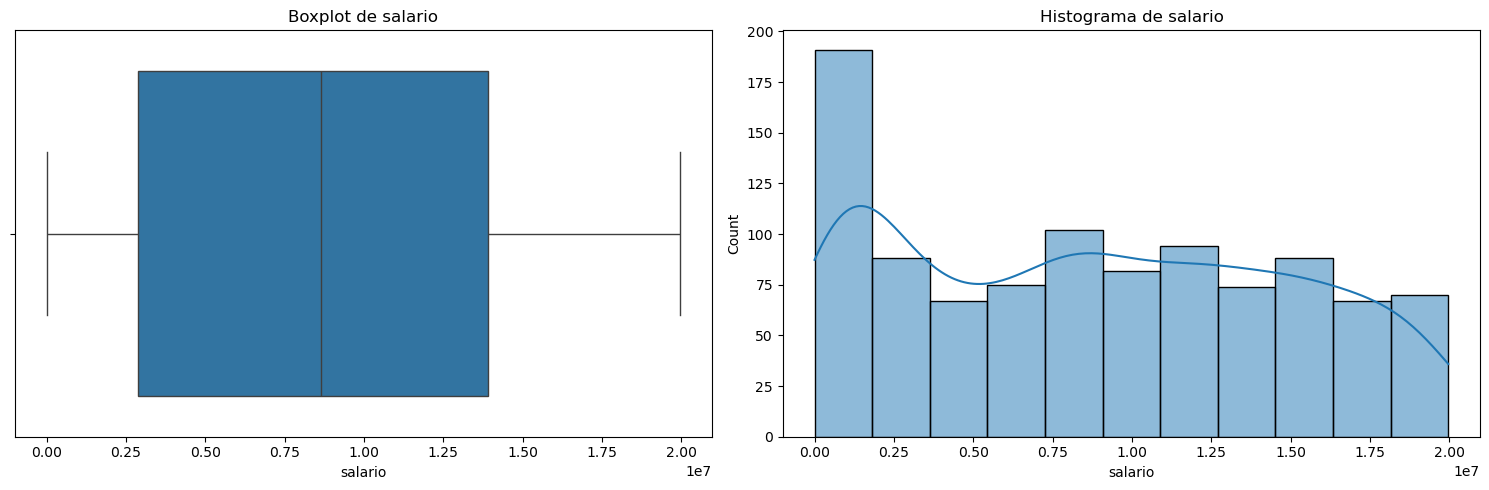

In [176]:
# visualizando
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=df2['salario'], ax=ax[0]).set_title('Boxplot de salario');
sns.histplot(x=df2['salario'], kde=True, ax=ax[1]).set_title('Histograma de salario');
plt.tight_layout()
plt.show()

## Report

1. **Renomeação de colunas:** As colunas do dataset foram renomeadas para nomes mais descritivos e padronizados:

    - Antes: X0, X1, X2, ...
    - Depois: id, score, estado, genero, idade, patrimonio, saldo, produtos, tem_cartao_credito, ativo, salario, saiu

2. **Tratamento de duplicatas:** Foram encontrados 2 registros duplicados na coluna id.
    - Correção: Os registros duplicados foram removidos, mantendo apenas a primeira ocorrência.

3. **Tratamento de Dados Categóricos**

    Atributo genero

    - Problemas Identificados:
        - Valores nulos: 8 registros.
        - Dados fora do domínio: códigos não padronizados como M, F, e Fem.
        
        
    - Correções Realizadas:
        - Substituição de valores nulos pela moda: Feminino.
        - Padronização dos valores para: Masculino e Feminino.


    Atributo estado

    - Problemas Identificados:
        - Dados fora do domínio: valores como SP, TD, e RP.

    - Correções Realizadas:
        - Substituição dos valores fora do domínio pela moda: RS.

4. **Tratamento de Dados Numéricos**

    Atributo idade

    - Problemas Identificados:
        - Valores fora do domínio: Idades inválidas (≤ 0 ou ≥ 110).
    - Correções Realizadas:
        - Substituição de valores fora do domínio pela mediana da coluna.


    Atributo salario

    - Problemas Identificados:
        - Valores nulos: 7 registros.
        - Outliers: Valores superiores a 2 desvios padrão acima da média.
    - Correções Realizadas:
        - Substituição de valores nulos pela mediana.
        - Substituição de outliers pela mediana, com base na regra do negócio.